# plot the FSC curve, given two halfmaps

In [1]:
# imports
from emmer.ndimage.fsc.fsc_utils import calculate_fsc
from emmer.ndimage.radial_profile.compute_radial_profile import compute_radial_profile
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [10]:
# load data

halfmap_1 = "/export/disk2/home1/tnw-cryosparc/processing/P51/J521/J521_004_volume_map_half_A.mrc"
halfmap_2 = "/export/disk2/home1/tnw-cryosparc/processing/P51/J521/J521_004_volume_map_half_B.mrc"
mask = "/export/disk2/home1/tnw-cryosparc/processing/P51/J521/J521_004_volume_mask_fsc.mrc"
global_resolution = 2.9

# load maps and calculate fsc
halfmap_1_mrc = mrcfile.open(halfmap_1)
halfmap_2_mrc = mrcfile.open(halfmap_2)
mask_mrc = mrcfile.open(mask)

halfmap_1_data = halfmap_1_mrc.data
halfmap_2_data = halfmap_2_mrc.data
mask_data = mask_mrc.data

# apply mask
halfmap_1_data = halfmap_1_data * mask_data
halfmap_2_data = halfmap_2_data * mask_data

fft_1 = np.fft.rfftn(halfmap_1_data)
fft_2 = np.fft.rfftn(halfmap_2_data)

profile, radii = compute_radial_profile(halfmap_1_data, return_indices=True)
freq, fsc, _ = calculate_fsc(fft_1, fft_2, radii, halfmap_1_data.shape)

# make a data frame out of the fsc data
fsc_df = pd.DataFrame({"freq": freq, "fsc": fsc, "profile": profile, "log_profile": np.log10(profile), "freq2": np.array(freq)**2})


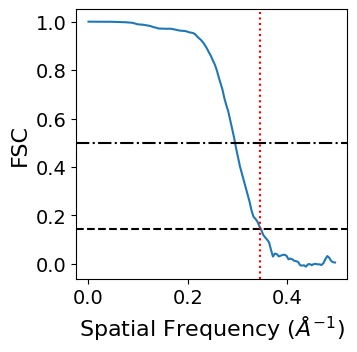

In [19]:
# plot the data
fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.lineplot(data=fsc_df, x="freq", y="fsc", ax=ax)
ax.set_xlabel("Spatial Frequency ($\AA^{-1}$)", fontsize=16)
ax.set_ylabel("FSC", fontsize=16)
# add line at 0.143
ax.axhline(0.143, color="black", linestyle="--")
# add line at 0.5
ax.axhline(0.5, color="black", linestyle="-.")
# add vertical line at the global resolution
ax.axvline(1/global_resolution, color="red", linestyle=":")
# increase tick size
ax.tick_params(axis="both", which="major", labelsize=14)
# save the figure
plt.savefig("figures/J521_fsc.pdf", bbox_inches="tight")


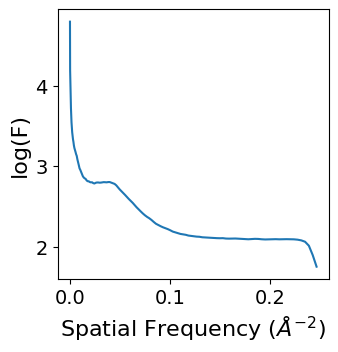

In [18]:
# also plot the radial profile
fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.lineplot(data=fsc_df, x="freq2", y="log_profile", ax=ax)
ax.set_xlabel("Spatial Frequency ($\AA^{-2}$)", fontsize=16)
ax.set_ylabel("log(F)", fontsize=16)
# ax_res = ax.twinx()
# ax_res.set_xticks(ax.get_xticks())
# ax_res.set_xbound(ax.get_xbound())
# ax_res.set_xticklabels([round(1/np.sqrt(x),1) for x in ax.get_xticks()])
# increase tick size
ax.tick_params(axis="both", which="major", labelsize=14)

# save the figure
plt.savefig("figures/J521_radial_profile.pdf", bbox_inches="tight")